In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read data
filename = '/nfs/spare11/env315/data/fish_length.npy'
length = np.load(filename)
print(length.shape)
filename = '/nfs/spare11/env315/data/fish_weight.npy'
weight = np.load(filename)
print(weight.shape)

(141,)
(141,)


In [6]:
x = sm.add_constant(length)
Y = weight

results = sm.OLS(Y,x).fit()


# Access individual parameters (coefficients)
print("\nCoefficients:")
print(results.params)

# print the complete result
results.summary()


Coefficients:
[-529.76712019   30.6061723 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1192.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           4.71e-70
Time:                        00:16:38   Log-Likelihood:                -853.90
No. Observations:                 141   AIC:                             1712.
Df Residuals:                     139   BIC:                             1718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -529.7671     27.226    -19.458      0.000    -583.598    -475.936
x1            30.6062      0.887     34.519      0.000      28.853      32.359
==============================================================================
Omnibus:                       11.738   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.759
Skew:                           0.712   Prob(JB):                      0.00170
Kurtosis:                       2.619   Cond. No.                         95.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

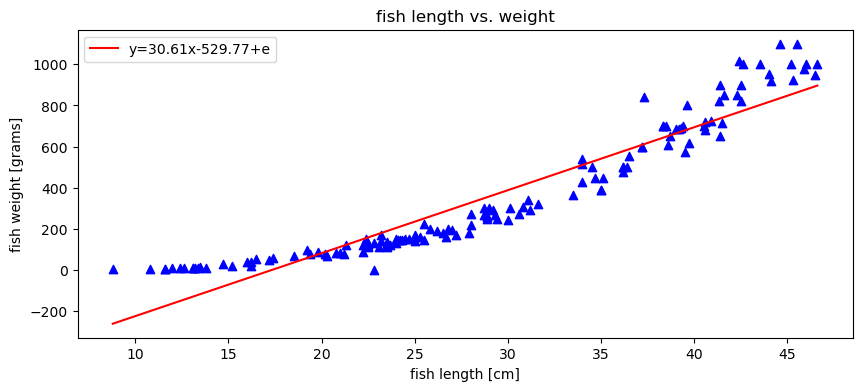

In [9]:
# Add the linear regression line to the scatterplot
figure = plt.figure(figsize=(10,4))
plt.scatter(length, weight, marker='^', c='b')
yhat = results.params[0] + results.params[1]*length
plt.plot(length, yhat, 'r', label='y='+f"{results.params[1]:.2f}"+'x'+f"{results.params[0]:.2f}"+'+e')
plt.xlabel('fish length [cm]')
plt.ylabel('fish weight [grams]')
plt.title('fish length vs. weight')

plt.legend()
plt.show()

In [10]:
# fish weight for fish length of 5 cm
yhat = results.params[0] + results.params[1]*5
print(yhat)

-376.73625870451406


In [11]:
x_nonlin = length**2
x_new = np.ndarray((len(length),2))
for ii in range(len(length)):
    x_new[ii,0] = length[ii]
    x_new[ii,1] = x_nonlin[ii]
print(x_new.shape)

x = sm.add_constant(x_new)
Y = weight

results2 = sm.OLS(Y,x).fit()


# Access individual parameters (coefficients)
print("\nCoefficients:")
print(results2.params)

# print the complete result
results2.summary()

(141, 2)

Coefficients:
[154.46384938 -22.70895993   0.91834512]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2456.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):          1.32e-108
Time:                        01:04:57   Log-Likelihood:                -759.35
No. Observations:                 141   AIC:                             1525.
Df Residuals:                     138   BIC:                             1534.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.4638     37.374      4.133      0.000      80.565     228.363
x1           -22.7090      2.739     -8.291      0.000     -28.125     -17.293
x2             0.9183      0.047     19.740      0.000       0.826       1.010
==============================================================================
Omnibus:                       37.697   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.655
Skew:                           0.932   Prob(JB):                     7.01e-29
Kurtosis:                       7.312   Cond. No.                     9.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# fish weight for fish length of 5 cm
yhat = results2.params[0] + results2.params[1]*5 + results2.params[2]*5**2
print(yhat)

63.87767781439822


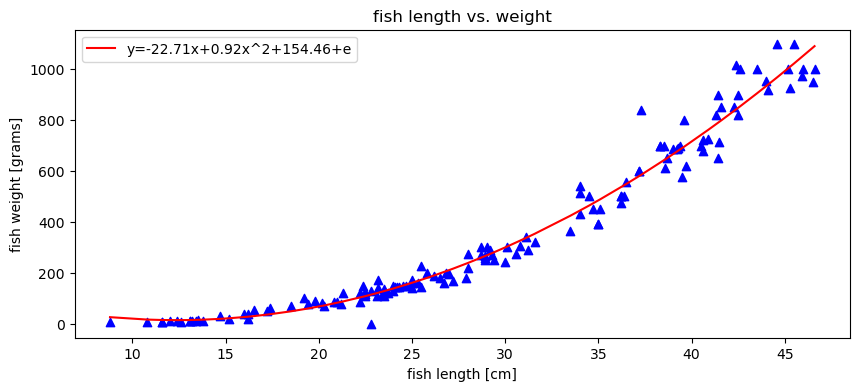

In [15]:
# Add the linear regression line to the scatterplot
figure = plt.figure(figsize=(10,4))
plt.scatter(length, weight, marker='^', c='b')
yhat = results2.params[0] + results2.params[1]*length + results2.params[2]*length**2
plt.plot(length, yhat, 'r', label='y='+f"{results2.params[1]:.2f}"+'x+'+f"{results2.params[2]:.2f}"+'x^2+'+f"{results2.params[0]:.2f}"+'+e')
plt.xlabel('fish length [cm]')
plt.ylabel('fish weight [grams]')
plt.title('fish length vs. weight')

plt.legend()
plt.show()